## Churn Prediction - Empresa de Telecomunicações

In [3]:
# Importar as Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Base de Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na plataforma de ensino da IBM Developer e atualmente pode ser encontrado [neste link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download) no Kaggle.

Conhecendo as variáveis do dataset:

* customerID - Código de identificação do consumidor;
* gender - Gênero do consumidor;
* SeniorCitizen -  Indica se o cliente tem 65 anos ou mais;
* Partner - Indica se o cliente é casado;
* tenure - Quantos meses a pessoa é cliente da empresa;
* PhoneService - Possui serviço telefônico;
* MultipleLines - Possui múltiplas linhas telefônicas;
* InternetService - Qual provedor de serviço de internet;
* OnlineSecurity - Possui serviço de segurança online;
* OnlineBackup - Possui serviço de backup online ativado;
* DeviceProtection - Cliente possui alguma proteção de sistema;
* TechSupport - Possui serviço de suporte técnico ativado;
* StreamingTV - Possui streaming de TV ativado;
* StreamingMovies - Possui serviço de streaming de filmes ativado;
* Contract - Tipo do contrato do consumidor;
* PaperlessBilling - Cliente utiliza faturamento sem papel;
* PaymentMethod - Método de pagamento;
* MonthlyCharges - Pagamento mensal atual;
* TotalCharges - Valor total que o cliente pagou pelos serviços durante todo o tempo;
* Churn - Cliente abandonou o serviço.

In [4]:
df = pd.read_csv('Telecom-Customer-Churn.csv')
print("O conjunto de dados contém {} linhas e {} colunas".format(df.shape[0], df.shape[1]))
df

O conjunto de dados contém 7043 linhas e 21 colunas


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
# Verificando dataset
df1 = df.drop(columns=['customerID', 'TotalCharges'])

check_dataset = pd.DataFrame({
    'type': df1.dtypes,
    'missing': df1.isna().sum(),
    'size': df1.shape[0],
    'unique': df1.nunique()
})
check_dataset['percentual'] = round(check_dataset['missing'] / check_dataset['size'], 2)
check_dataset

,type,missing,size,unique,percentual
gender,object,0,7043,2,0.00
SeniorCitizen,int64,0,7043,2,0.00
Partner,object,0,7043,2,0.00
Dependents,object,0,7043,2,0.00
tenure,int64,0,7043,73,0.00
PhoneService,object,0,7043,2,0.00
MultipleLines,object,0,7043,3,0.00
InternetService,object,0,7043,3,0.00
OnlineSecurity,object,0,7043,3,0.00
OnlineBackup,object,0,7043,3,0.00


Algumas observações sobre o dataset do estudo:

* A coluna customerID trata-se de um código de identificação dos clientes, por isso foi excluída do dataset.
* A variável alvo é a coluna Churn, ela indica se o cliente cancelou ou não o serviço.
* A coluna TotalCharges assim como a coluna MonthlyCharges, apresenta valores flutuantes, mas está como tipo string uma vez que seu tipo de dado deveria ser float.
* Ao tentar converter a coluna TotalCharges para tipo float apresentou um erro porque os dados ausentes foram preenchidos com " ". Foi criada uma função para lidar com o erro e em seguida uma imputação de valores utilizando a mediana.

### Análise Exploratória dos Dados (EDA)

Principais insights das variáveis categóricas em relação a variável que iremos prever (Churn):

* Clientes que não possuem dependentes e que não são casados tem maior probabilidade de abandonar os serviços;
* Como podemos observar, os cliente que não possuem internet tendem a permanecer mais tempo com a empresa;
* A qualidade do serviço deve ser considerada na estratégia de reter o cliente, pois podemos observar uma taxa de Churn considerável para os consumidores que possuem streaming e internet de fibra ótica.

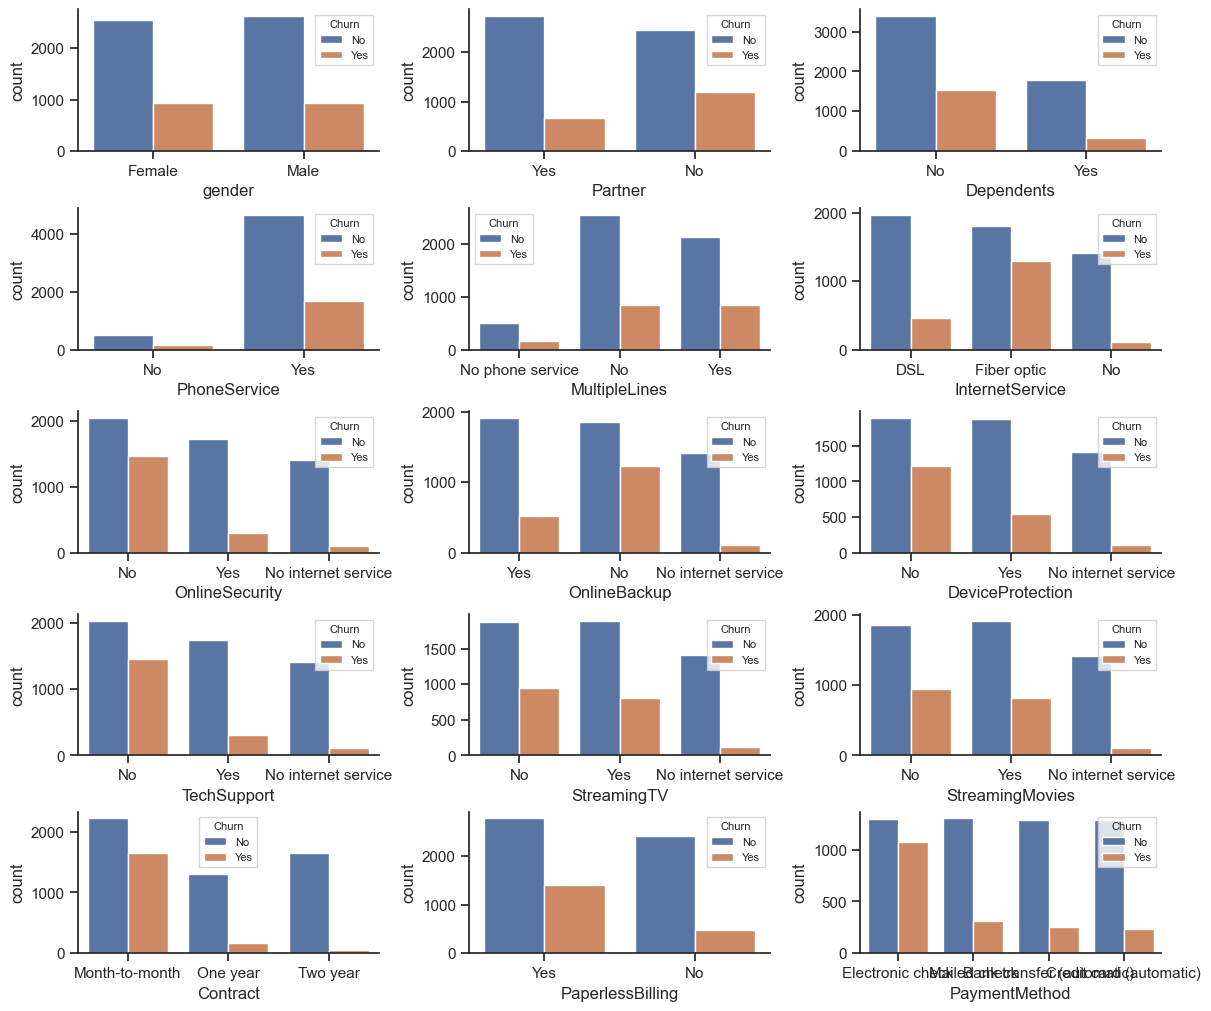

In [11]:
df2 = df1.copy()
df2 = df2.drop(columns=['Churn'])

df_columns = df2.select_dtypes(include='object').columns.tolist()

# Gráfico das variáveis categóricas
rc_params = {'axes.spines.top': False,
             'axes.spines.right': False,
             'legend.fontsize': 8,
             'legend.title_fontsize': 8,
             'legend.loc': 'upper right',
             'legend.fancybox': False,
             'axes.titleweight': 'bold',
             'axes.titlesize': 12,
             'axes.titlepad': 12}
sns.set_theme(style='ticks', rc=rc_params)
sns.set_color_codes('muted')

num_plots = len(df_columns)
total_cols = 3
total_rows = (num_plots + total_cols - 1) // total_cols
fig1, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(12, 10), constrained_layout=True)

for i, col in enumerate(df_columns):
    row = i // total_cols
    pos = i % total_cols
    sns.countplot(x=col, data=df1, hue='Churn', ax=axs[row][pos])
    axs[row][pos].set_xticklabels(axs[row][pos].get_xticklabels())

plt.show()

**Contratos**

A maioria dos contratos é do tipo Month-to-month, esses clientes tendem cancelar mais os serviços. Dessa forma, a empresa precisa pensar em uma forma de reter esses clientes com um contrato maior e com melhores serviços de internet, visto que, os clientes que mais abandonam a empresa são os que possuem internet.

In [12]:
# Porcentagem dos Contratos
contratos = (df[df.Contract == 'Month-to-month'].shape[0] / df.shape[0]) * 100

# Porcentagem dos Contratos Month-to-Month dos clientes churn
contratos_churn = (df[(df.Churn == 'Yes') & (df.Contract == 'Month-to-month')].shape[0] / df[df.Churn == 'Yes'].shape[0]) * 100

# Porcentagem dos Contratos Month-to-Month dos clientes no churn
contratos_nochurn = (df[(df.Churn == 'No') & (df.Contract == 'Month-to-month')].shape[0] / df[df.Churn == 'No'].shape[0]) * 100

print('Porcentagem de contratos mensais: {:.2f}%'.format(contratos))
print('Porcentagem de contratos mensais de clientes que não cancelaram: {:.2f}%'.format(contratos_nochurn))
print('Porcentagem de contratos mensais de clientes que cancelaram: {:.2f}%'.format(contratos_churn))

Porcentagem de contratos mensais: 55.02%
Porcentagem de contratos mensais de clientes que não cancelaram: 42.91%
Porcentagem de contratos mensais de clientes que cancelaram: 88.55%


**Churn**

É perceptível a diferença entre as classes No e Yes da variável Churn. Para obter os melhores resultados com o modelo de Machine Learning , é preciso fazer o balanceamento das classes.

Porcentagem de Churn é **26.54%** no dataset.

Conforme o gráfico abaixo, os dados relacionados com a variável alvo Churn está desbalanceada, onde apenas 26,54% dos dados totais estão relacionados com os clientes que cancelaram o serviço.

No     5174
Yes    1869
Name: Churn, dtype: int64

Porcentagem de Churn 26.54% no dataset.



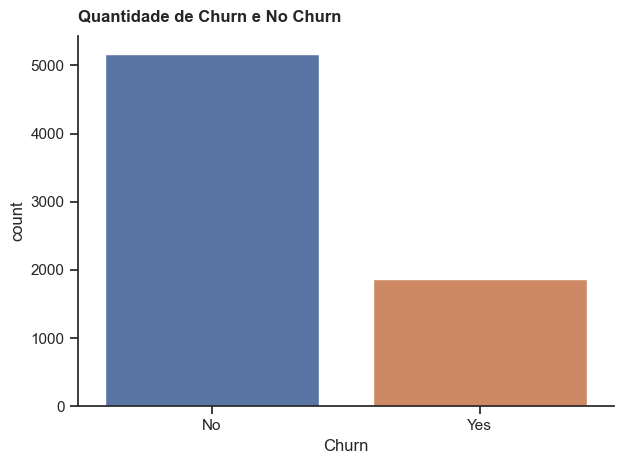

In [13]:
# Quantidade de Churn e No Churn
print(df.Churn.value_counts())
print('\nPorcentagem de Churn {:.2f}% no dataset.\n'.format((df[df.Churn == "Yes"].shape[0] / df.shape[0]) * 100))

sns.countplot(x=df.Churn)
plt.title('Quantidade de Churn e No Churn', fontsize=12, loc='left', pad=10)
plt.tight_layout()
plt.show()

Comparação dos tipos de contrato

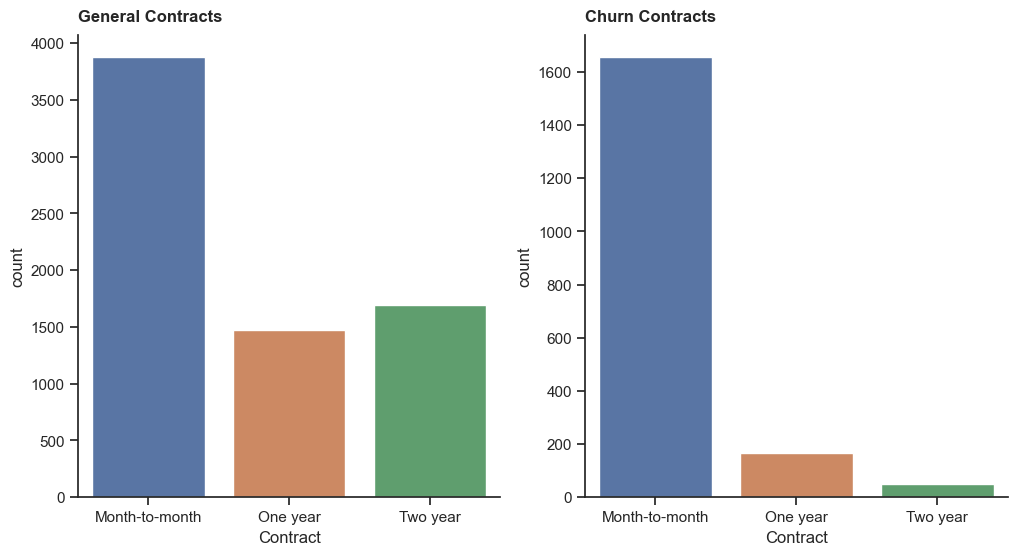

In [15]:
df_churn = df[df.Churn == 'Yes']
df_nochurn = df[df.Churn == 'No']

fig3, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='Contract', data=df, ax=ax[0])
ax[0].set_title('General Contracts', fontsize=12, loc='left', pad=10)

sns.countplot(x='Contract', data=df_churn, order=['Month-to-month', 'One year', 'Two year'], ax=ax[1])
ax[1].set_title('Churn Contracts', fontsize=12, loc='left', pad=10)

plt.show()

In [18]:
# Limpeza dos Dados
df3 = df.copy()
df3.drop('customerID', axis=1, inplace=True)

df3.replace(['No internet service', 'No phone service'], 'No', inplace=True)
df3.replace(['Bank transfer (automatic)', 'Credit card (automatic)'], 'Automatic', inplace=True)

# Convertendo a coluna TotalCharges para float
def converter_str_float(column):
    try:
        return float(column)
    except ValueError:
        return np.nan

df3['TotalCharges'] = df3['TotalCharges'].apply(converter_str_float)
print('Total Charges nan values: {}'.format(df3['TotalCharges'].isnull().sum()))

# Alterando os valores nulos com a Mediana
df3["TotalCharges"].fillna(df3.TotalCharges.median(), inplace=True)

Total Charges nan values: 11


Com base no histograma abaixo é possível entender que:

* As variáveis TotalCharges e tenure estão relacionadas indiretamente, ou seja, quanto mais tempo de permanência na operadora maior a taxa de retenção do cliente;
* Quanto maior o preço da mensalidade do serviço, maior a chance de perder o cliente.

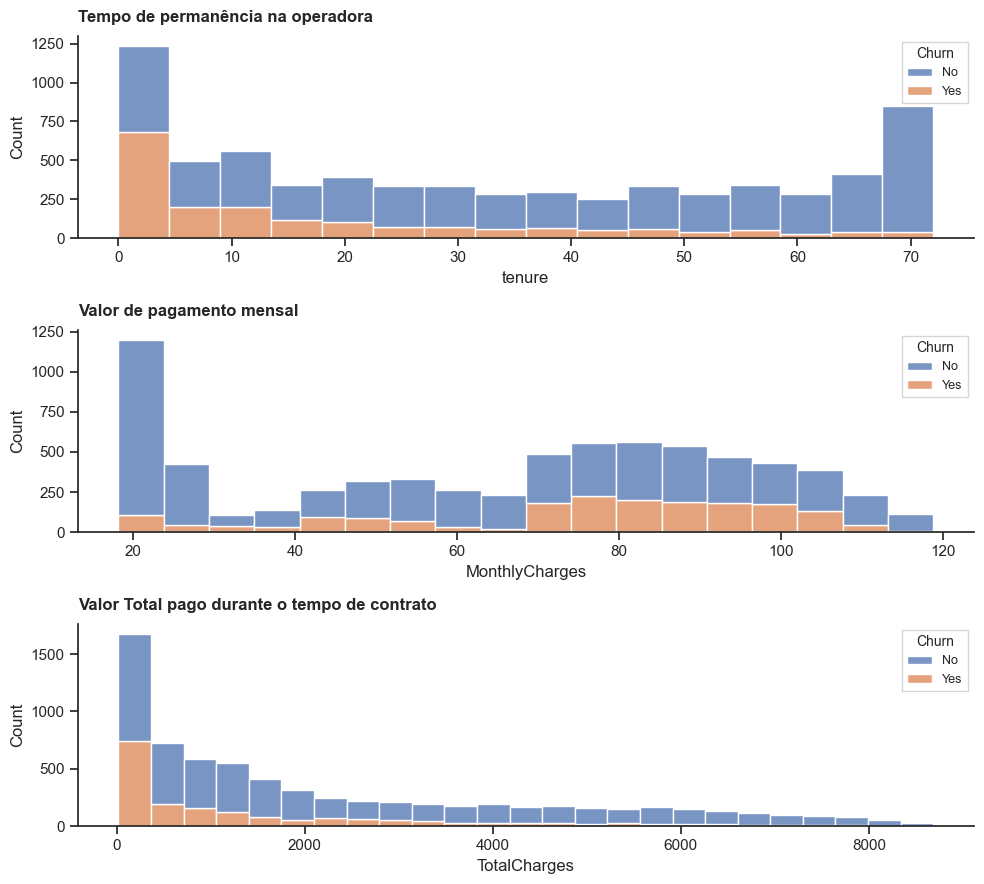

In [19]:
# Histograma das variáveis
custom_params = {'axes.spines.right': False,
                 'axes.spines.top': False,
                 'legend.fontsize': 9,
                 'legend.title_fontsize': 10,
                 'legend.loc': 'upper right'}
sns.set_theme(style='ticks', rc=custom_params)
sns.set_color_codes('muted')

fig2, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 9), constrained_layout=True)

sns.histplot(data=df3, x='tenure', hue='Churn', multiple='stack', ax=ax[0])
ax[0].set_title('Tempo de permanência na operadora', fontsize=12, loc='left', pad=10)

sns.histplot(data=df3, x='MonthlyCharges', hue='Churn', multiple='stack', ax=ax[1])
ax[1].set_title('Valor de pagamento mensal', fontsize=12, loc='left', pad=10)

sns.histplot(data=df3, x='TotalCharges', hue='Churn', multiple='stack', ax=ax[2])
ax[2].set_title('Valor Total pago durante o tempo de contrato', fontsize=12, loc='left', pad=10)

plt.tight_layout()
plt.show()

### Estatistica descritiva
Conforme método describe abaixo é possível notar que não há presença de outliers.

In [20]:
describe = df3.describe()
describe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2281.92
std,0.37,24.56,30.09,2265.27
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,402.23
50%,0.00,29.00,70.35,1397.47
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


Assim como, nos gráficos de boxplot.

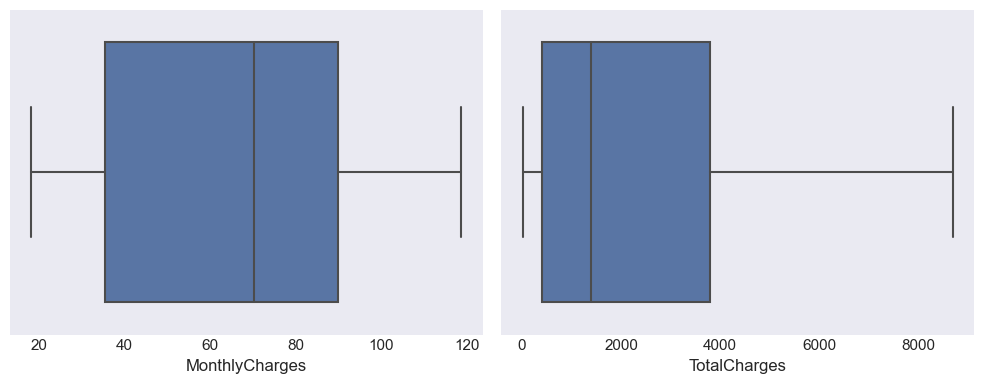

In [22]:
# Plotar gráficos boxplot para verificar a presença de outliers
plt.style.use('seaborn-dark')
fig4, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), constrained_layout=True)

sns.boxplot(x=df3['MonthlyCharges'], ax=ax[0])
sns.boxplot(x=df3['TotalCharges'], ax=ax[1])

plt.tight_layout()
plt.show()

### Pré-Processamento dos dados

Nesta etapa é necessário fazer um pré-processamento dos dados. O primeiro passo é transformar as variáveis categóricas em valores numéricos. Para isso, será utilizado o LabelEncoder para transformar as variáveis binárias em valores de 0 e 1.

Em seguida, as variáveis categóricas serão tratadas com o getDummies, que faz a transformação de forma direta das variáveis categóricas, assim poderão ser utilizadas em todos os modelos.

In [23]:
var_bi = df3.nunique()[df3.nunique() == 2].keys().tolist()
var_num = [col for col in df3.select_dtypes(['int', 'float']).columns.tolist() if col not in var_bi]
var_cat = [col for col in df3.columns.tolist() if col not in var_bi + var_num]

# Aplicando o LabelEncoder no dataframe para variáveis binárias
df4 = df3.copy()

le = LabelEncoder()
for i in var_bi:
    df4[i] = le.fit_transform(df4[i])

df4 = pd.get_dummies(df4, columns=var_cat)

### Preparação dos Dados para treinar o modelo

In [24]:
# Separar dados entre Treino e Teste
X = df4.drop('Churn', axis=1)
y = df4['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Importar Modelos a serem avaliados
rf = RandomForestClassifier()
svc = SVC()
lr = LogisticRegression()
knn = KNeighborsClassifier()
xgb = XGBClassifier()

### Validação Cruzada

In [25]:
# Função para Validação Cruzada
def val_model_balanced(X, y, model, scaler=None, quite=False):
    if scaler is not None:
        X = scaler.fit_transform(X)

    scores = cross_val_score(model, X, y, scoring='recall')

    if not quite:
        print('Recall: {:.4f} (+/- {:.4f})'.format(scores.mean(), scores.std() * 2))
    
    return scores.mean()

### Padronização e Balanceamento

Para a padronização será usado **StandardScale**r e **RobustScaler**, para ter uma melhor comparação entre os métodos. Em seguida os dados padronizados serão combinados com o balanceamento **Random UnderSampling** e **ADASYN**. 


In [26]:
# Desempenho dos modelos com os dados padronizados
print('\nDesempenho dos modelos com os dados padronizados')
models = [rf, svc, lr, knn, xgb]
model_names = ['Random Forest', 'SVC', 'Logistic Regression', 'KNN', 'XGBoost']

for model, model_name in zip(models, model_names):
    print(f'Cross-validation {model_name}:')
    score_test = val_model_balanced(X_train, y_train, model, scaler=StandardScaler())

# Padronização e Balanceamento dos Dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Rob_scaler = RobustScaler()
X_train_Rscaled = Rob_scaler.fit_transform(X_train)


Desempenho dos modelos com os dados padronizados
Cross-validation Random Forest:
Recall: 0.4896 (+/- 0.0286)
Cross-validation SVC:
Recall: 0.4880 (+/- 0.0402)
Cross-validation Logistic Regression:
Recall: 0.5259 (+/- 0.0487)
Cross-validation KNN:
Recall: 0.5112 (+/- 0.0547)
Cross-validation XGBoost:
Recall: 0.4950 (+/- 0.0822)


**Random UnderSampling**

Como os dados da variável alvo Churn encontra-se desbalanceado. O método Random Under Sampling é simples e envolve a exclusão aleatória de algumas instâncias da classe majoritária.

0    1295
1    1295
Name: Churn, dtype: int64


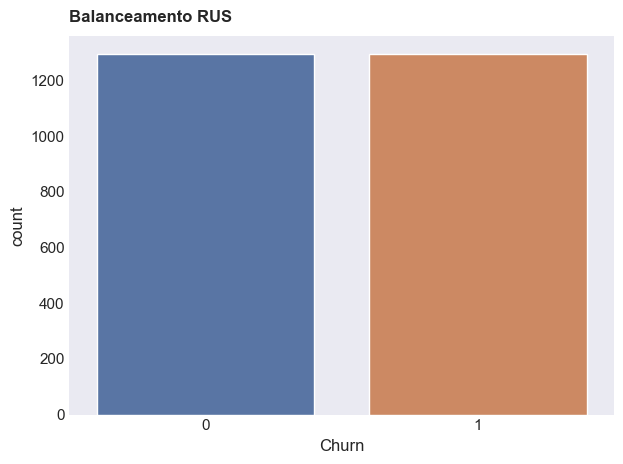

In [27]:
# Balanceamento RUS
rus = RandomUnderSampler()
X_rus_scaled, y_train_rus_scaled = rus.fit_resample(X_train_scaled, y_train)
X_rus_Rscaled, y_train_rus_Rscaled = rus.fit_resample(X_train_Rscaled, y_train)

# Checando o balanceamento das classes
print(pd.Series(y_train_rus_scaled).value_counts())

sns.countplot(x=y_train_rus_scaled)
plt.title('Balanceamento RUS', fontsize=12, loc='left', pad=10)
plt.tight_layout()
plt.show()

**ADASYN**

No balanceamento ADASYN são adicionadas entradas e tenta fazer uma diferenciação das entradas já existentes, leva em consideração a densidade de distribuição para distribuir os pontos de dados uniformemente

0    3635
1    3512
Name: Churn, dtype: int64


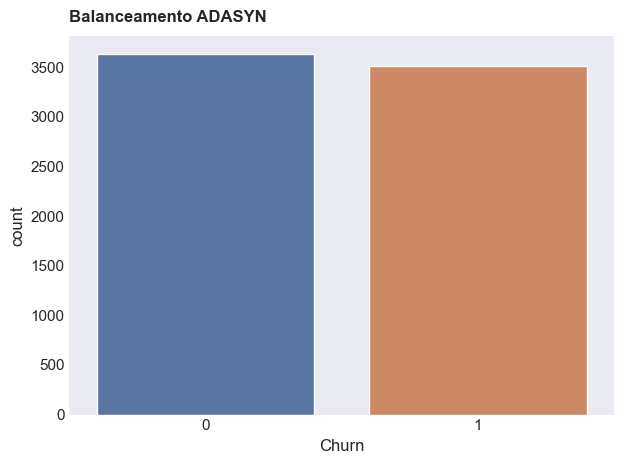

In [28]:
# Balanceamento ADASYN
ada = ADASYN()
X_ada_scaled, y_train_ada_scaled = ada.fit_resample(X_train_scaled, y_train)
X_ada_Rscaled, y_train_ada_Rscaled = ada.fit_resample(X_train_Rscaled, y_train)

# Checando o balanceamento das classes
print(pd.Series(y_train_ada_scaled).value_counts())

plt.title('Balanceamento ADASYN', fontsize=12, loc='left', pad=10)
sns.countplot(x=y_train_ada_scaled)
plt.tight_layout()
plt.show()

### Avaliando os Modelos com Cross-Validation (Dados Balanceados e Padronizados)

In [29]:
# Cross-Validation com Balanceamento RUS e StandardScaler
print('\nCross-Validation com Balanceamento RUS e StandardScaler')
for model, model_name in zip(models, model_names):
    print(f'Cross-validation {model_name}:')
    score_test = val_model_balanced(X_rus_scaled, y_train_rus_scaled, model, scaler=StandardScaler())

# Cross-Validation com Balanceamento RUS e RobustScaler
print('\nCross-Validation com Balanceamento RUS e RobustScaler')
for model, model_name in zip(models, model_names):
    print(f'Cross-validation {model_name}:')
    score_test = val_model_balanced(X_rus_Rscaled, y_train_rus_Rscaled, model, scaler=RobustScaler())

# Cross-Validation com Balanceamento ADASYN e StandardScaler
print('\nCross-Validation com Balanceamento ADASYN e StandardScaler')
for model, model_name in zip(models, model_names):
    print(f'Cross-validation {model_name}:')
    score_test = val_model_balanced(X_ada_scaled, y_train_ada_scaled, model, scaler=StandardScaler())

# Cross-Validation com Balanceamento ADASYN e RobustScaler
print('\nCross-Validation com Balanceamento ADASYN e RobustScaler')
for model, model_name in zip(models, model_names):
    print(f'Cross-validation {model_name}:')
    score_test = val_model_balanced(X_ada_Rscaled, y_train_ada_Rscaled, model, scaler=RobustScaler())


Cross-Validation com Balanceamento RUS e StandardScaler
Cross-validation Random Forest:
Recall: 0.7676 (+/- 0.0438)
Cross-validation SVC:
Recall: 0.7799 (+/- 0.0664)
Cross-validation Logistic Regression:
Recall: 0.7992 (+/- 0.0608)
Cross-validation KNN:
Recall: 0.7915 (+/- 0.0761)
Cross-validation XGBoost:
Recall: 0.7583 (+/- 0.0573)

Cross-Validation com Balanceamento RUS e RobustScaler
Cross-validation Random Forest:
Recall: 0.7676 (+/- 0.0527)
Cross-validation SVC:
Recall: 0.7869 (+/- 0.0543)
Cross-validation Logistic Regression:
Recall: 0.7977 (+/- 0.0454)
Cross-validation KNN:
Recall: 0.7969 (+/- 0.0485)
Cross-validation XGBoost:
Recall: 0.7320 (+/- 0.0671)

Cross-Validation com Balanceamento ADASYN e StandardScaler
Cross-validation Random Forest:
Recall: 0.8634 (+/- 0.2043)
Cross-validation SVC:
Recall: 0.8406 (+/- 0.0557)
Cross-validation Logistic Regression:
Recall: 0.7807 (+/- 0.1118)
Cross-validation KNN:
Recall: 0.9080 (+/- 0.0649)
Cross-validation XGBoost:
Recall: 0.8023 (

In [30]:
# Imprimindo Tabela dos Modelos escolhidos
model_scores = []

for model, model_name in zip(models, model_names):
    recall_score = val_model_balanced(X_ada_Rscaled, y_train_ada_Rscaled, model, scaler=RobustScaler(), quite=True)
    model_scores.append(recall_score)

recall_model = pd.DataFrame(data=model_scores, index=model_names, columns=['Recall'])
print(recall_model)

                     Recall
Random Forest          0.86
SVC                    0.84
Logistic Regression    0.78
KNN                    0.90
XGBoost                0.80


Após realizar a validação de todos os modelos, o balanceamento **ADASYN** com padronização **RobustScaler** obtiveram melhores desempenhos.

### Hiperparametros

A fim de obter resultados mais consistentes foi realizado um processo de otimização de hiperparâmetros utilizando o algoritmo **GridSearchCV** do **Scikit-Learn**, que visa escolher o melhor conjunto de hiperparâmetros a partir de uma validação cruzada.

In [49]:
# Definição dos parâmetros para cada modelo
param_grid_rf = {
    'max_depth': [5, 10, 20, 30, 40, 50, None],
    'n_estimators': [10, 100, 1000],
    'max_features': ['auto', 'sqrt', 'log2']
}

param_grid_svc = {
    'C': [100, 10, 20, 1.0, 0.1, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

param_grid_rl = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}

param_grid_knn = {
    'n_neighbors': [1, 3, 5,  10],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

param_grid_xgb = {
    'n_estimators': [100, 200, 1000],
    'max_depth': [1, 3, 6],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 1, 5]
}

In [50]:
# Função para executar o GridSearchCV
def run_grid_search(model, param_grid):
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    grid_search = GridSearchCV(model, param_grid=param_grid, scoring='recall', n_jobs=-1, cv=kfold)
    grid_result = grid_search.fit(X_ada_Rscaled, y_train_ada_Rscaled)
    print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')
    return grid_result.best_estimator_

# Execução do GridSearchCV para cada modelo
rf = RandomForestClassifier()
best_rf = run_grid_search(rf, param_grid_rf)

svc = svm.SVC(gamma='auto')
best_svc = run_grid_search(svc, param_grid_svc)

lr = LogisticRegression()
best_lr = run_grid_search(lr, param_grid_rl)

knn = KNeighborsClassifier()
best_knn = run_grid_search(knn, param_grid_knn)

xgb = XGBClassifier(learning_rate=0.01)
best_xgb = run_grid_search(xgb, param_grid_xgb)

Melhor: 0.9092231523851794 para {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 1000}
Melhor: 0.9332915015074761 para {'C': 0.1, 'kernel': 'poly'}
Melhor: 0.8239612188365651 para {'C': 0.0018329807108324356, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Melhor: 0.9482430633139991 para {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Melhor: 0.8895647449533983 para {'gamma': 0, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100}


### Definindo o mellhor modelo

Relatório de Classificação - Random Forest Classifier :

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1539
           1       0.54      0.77      0.64       574

    accuracy                           0.76      2113
   macro avg       0.72      0.77      0.73      2113
weighted avg       0.80      0.76      0.77      2113

AUC: 0.7659



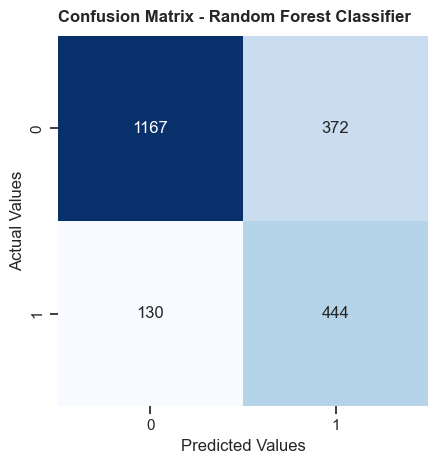

Relatório de Classificação - SVC :

              precision    recall  f1-score   support

           0       0.97      0.37      0.54      1539
           1       0.36      0.97      0.53       574

    accuracy                           0.53      2113
   macro avg       0.67      0.67      0.53      2113
weighted avg       0.80      0.53      0.53      2113

AUC: 0.6686



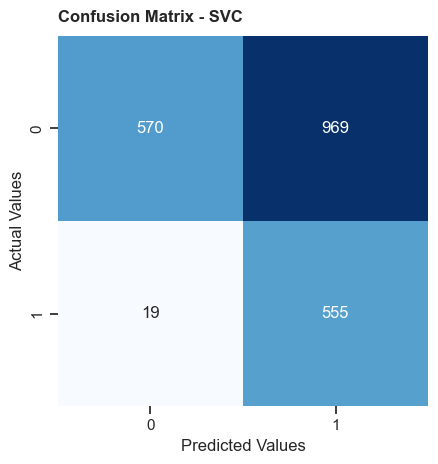

Relatório de Classificação - Logistic Regression :

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1539
           1       0.44      0.90      0.59       574

    accuracy                           0.66      2113
   macro avg       0.69      0.73      0.65      2113
weighted avg       0.80      0.66      0.67      2113

AUC: 0.7345



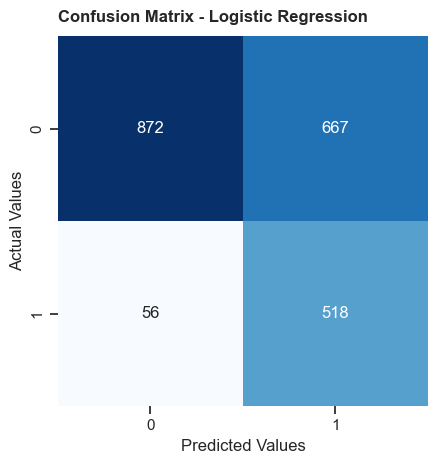

Relatório de Classificação - KNeighbors Classifier :

              precision    recall  f1-score   support

           0       0.88      0.64      0.74      1539
           1       0.44      0.76      0.56       574

    accuracy                           0.67      2113
   macro avg       0.66      0.70      0.65      2113
weighted avg       0.76      0.67      0.69      2113

AUC: 0.7006



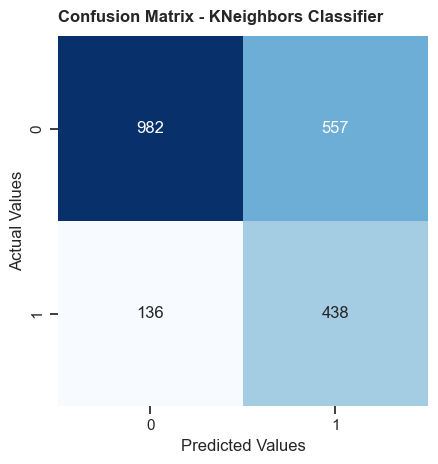

Relatório de Classificação - XGBClassifier :

              precision    recall  f1-score   support

           0       0.94      0.59      0.73      1539
           1       0.45      0.90      0.60       574

    accuracy                           0.68      2113
   macro avg       0.70      0.75      0.66      2113
weighted avg       0.81      0.68      0.69      2113

AUC: 0.7469



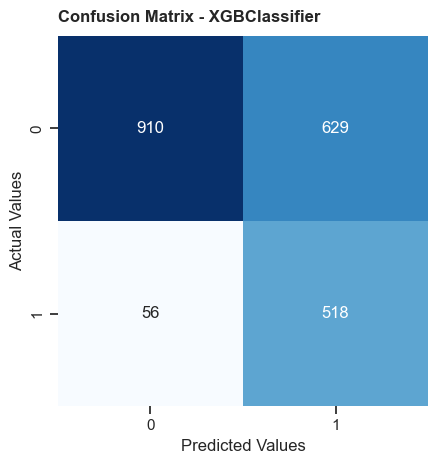

In [51]:
# Avaliação dos melhores modelos
models = [best_rf, best_svc, best_lr, best_knn, best_xgb]
model_names = ['Random Forest Classifier', 'SVC', 'Logistic Regression', 'KNeighbors Classifier', 'XGBClassifier']

for model, model_name in zip(models, model_names):
    model.fit(X_ada_Rscaled, y_train_ada_Rscaled)

    X_test_Rscaled = Rob_scaler.transform(X_test)
    y_pred = model.predict(X_test_Rscaled)

    print('Relatório de Classificação -', model_name, ':\n')
    print(classification_report(y_test, y_pred))
    
    # Imprimir a área sob curva
    print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))
    
    # Gráfico Matriz Confusão
    f, ax = plt.subplots()
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), fmt='g', cmap='Blues', square=True, annot=True, cbar=False)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    ax.set_title(f'Confusion Matrix - {model_name}', fontsize=12, loc='left', pad=10)
    plt.tight_layout()
    plt.show()

### Considerações Finais

O churn é uma preocupação para todas as empresas, e por meio de modelos de Machine Learning, é possível reduzir esse número com a predição de churn.

O modelo escolhido neste estudo foi baseado na métrica recall, com o objetivo de acertar o máximo de churn em clientes que realmente cancelaram o serviço.

Dessa forma, é possível prever, entre os novos dados de clientes, quais podem cancelar o serviço e buscar maneiras de antecipar e contribuir para reter e fidelizar o cliente.

Conforme os testes realizados, o modelo que obteve os melhores resultados foi definitivamente o modelo SVC que foi treinado com os dados balanceados no método ADASYN e com padronização RobustScaler.

Esse modelo obteve:
* 518 previsões de Churn;
* 19 previsões de falsos negativos;
* 969 previsões de falsos positivos.


É importante ressaltar que o projeto tem margem para melhorias, e estou aberto a sugestões. 